**DATA OVERVIEW** : This dataset is a Monet with 430 observations and 6 columns. The data contains the price of the paint along with the features like height, width, Signed, Picture, House.

**GOAL** : Developing a linear regression model which can predict the price of the painting using the different independent variable. We will be using both simple linear regression and multi linear regression

In [18]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

## **TASK**-**1**

In [10]:
#Import dataset
dataset = pd.read_csv('monet.csv')
dataset.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [12]:
#creating a new column called area by multiplying height and width
dataset["AREA"]=dataset["HEIGHT"]*dataset["WIDTH"]

In [14]:
#new dataset
dataset.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
 6   AREA     430 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 23.6 KB


In [16]:
dataset.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628,940.811558
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592,676.539289
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000,26.130000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000,637.902500
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000,816.640000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000,1036.605000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000,6193.690000


In [15]:
dataset.columns

Index(['PRICE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE ', 'AREA'], dtype='object')

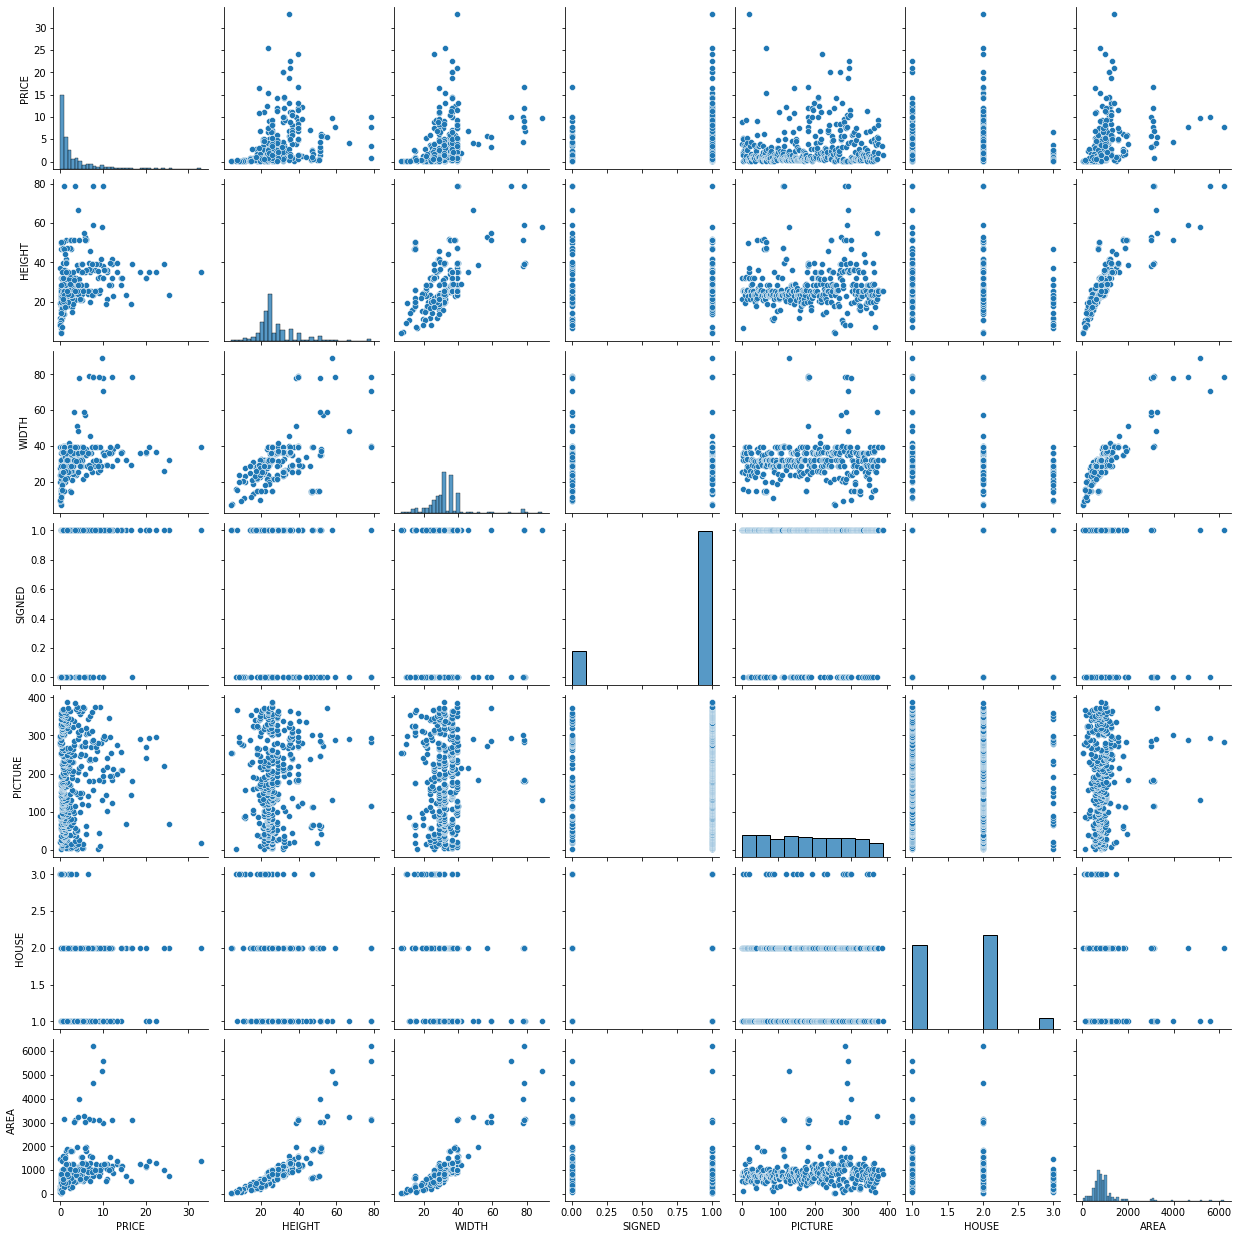

In [19]:
# EDA for the given data
sns.pairplot(dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


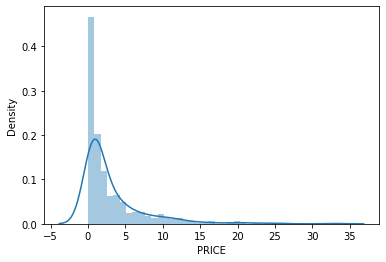

In [20]:
# price distribution plotting
sns.distplot(dataset["PRICE"])

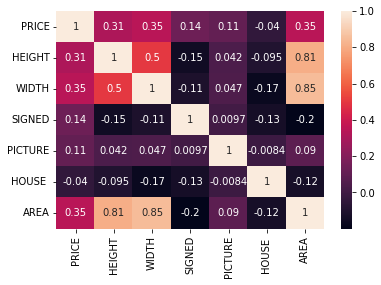

In [22]:
# corelation
sns.heatmap(dataset.corr(), annot=True)

linear regression model 1 between **area** and **price**

In [41]:
# Defining X and y axis
X = dataset[["AREA"]]
Y = dataset["PRICE"]

In [42]:
# splitting for test and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [43]:
# Creating and training linear regression model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [44]:
# checking the model score 
print(lm.intercept_)

1.0910398588176098


In [ ]:
# as the model score is near 1 it is a good model and we can proceed

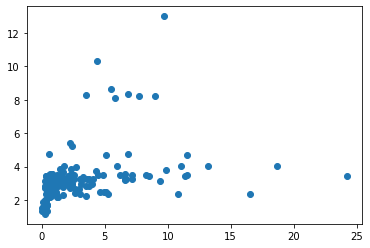

In [54]:
# model prediction
predictions = lm.predict(X_test)
# scatterplot
plt.scatter(Y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


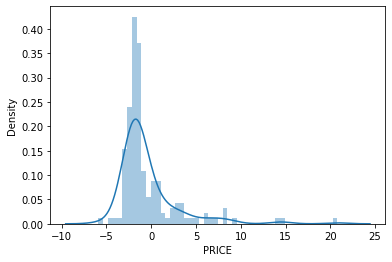

In [55]:
# histogram representation
sns.distplot((y_test-predictions),bins=50);

Error metrics for model 1

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 2.3854394181552556
MSE: 11.751633455497638
RMSE: 3.428065555892658


Linear regression model 2 between **Height** and **Price**

In [74]:
# Defining X and y axis
X = dataset[["WIDTH"]]
Y = dataset["PRICE"]

In [75]:
# splitting for test and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [76]:
# Creating and training linear regression model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [77]:
# checking the model score 
print(lm.intercept_)

-2.516648614211575


In [78]:
# as the model score is way below 0 it is not a good model but still lets continue and see the results

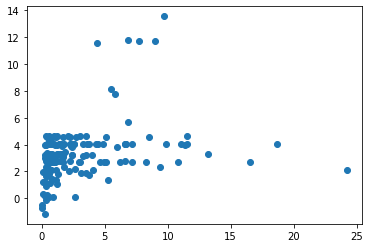

In [79]:
# model prediction
predictions = lm.predict(X_test)
# scatterplot
plt.scatter(Y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


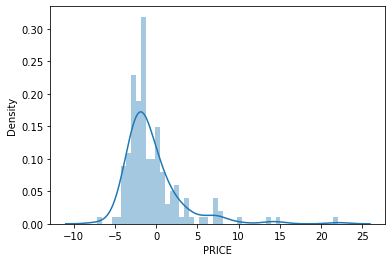

In [80]:
# histogram representation
sns.distplot((y_test-predictions),bins=50);

Error metrics for model 2

In [81]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 2.522174646710116
MSE: 13.052874211219628
RMSE: 3.612876168818913


Both the models got slightly different error scores

## **TASK-2**

In [86]:
dataset.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


In [89]:
# Normalizing the data by applying Min-MAX scaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_dataset = scaler.fit_transform(dataset)
minmax_dataset = pd.DataFrame(minmax_dataset, columns =dataset.columns)

minmax_dataset

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
0,0.120697,0.232620,0.229648,1.0,0.000000,0.0,0.084174
1,0.266326,0.374332,0.229648,1.0,0.002591,0.5,0.128172
2,0.003675,0.040107,0.111786,0.0,0.005181,1.0,0.013552
3,0.061421,0.291444,0.307412,1.0,0.007772,0.5,0.129106
4,0.044756,0.291444,0.307412,1.0,0.007772,0.5,0.129106
...,...,...,...,...,...,...,...
425,0.159745,0.290107,0.397327,1.0,0.968912,0.0,0.159303
426,0.283067,0.294118,0.399757,1.0,0.968912,0.5,0.162059
427,0.249737,0.290107,0.399757,1.0,0.968912,0.0,0.160133
428,0.103008,0.290107,0.397327,1.0,0.997409,0.5,0.159303


In [91]:
# minmax_dataset is the new normalized dataset
minmax_dataset.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,AREA
0,0.120697,0.232620,0.229648,1.0,0.000000,0.0,0.084174
1,0.266326,0.374332,0.229648,1.0,0.002591,0.5,0.128172
2,0.003675,0.040107,0.111786,0.0,0.005181,1.0,0.013552
3,0.061421,0.291444,0.307412,1.0,0.007772,0.5,0.129106
4,0.044756,0.291444,0.307412,1.0,0.007772,0.5,0.129106


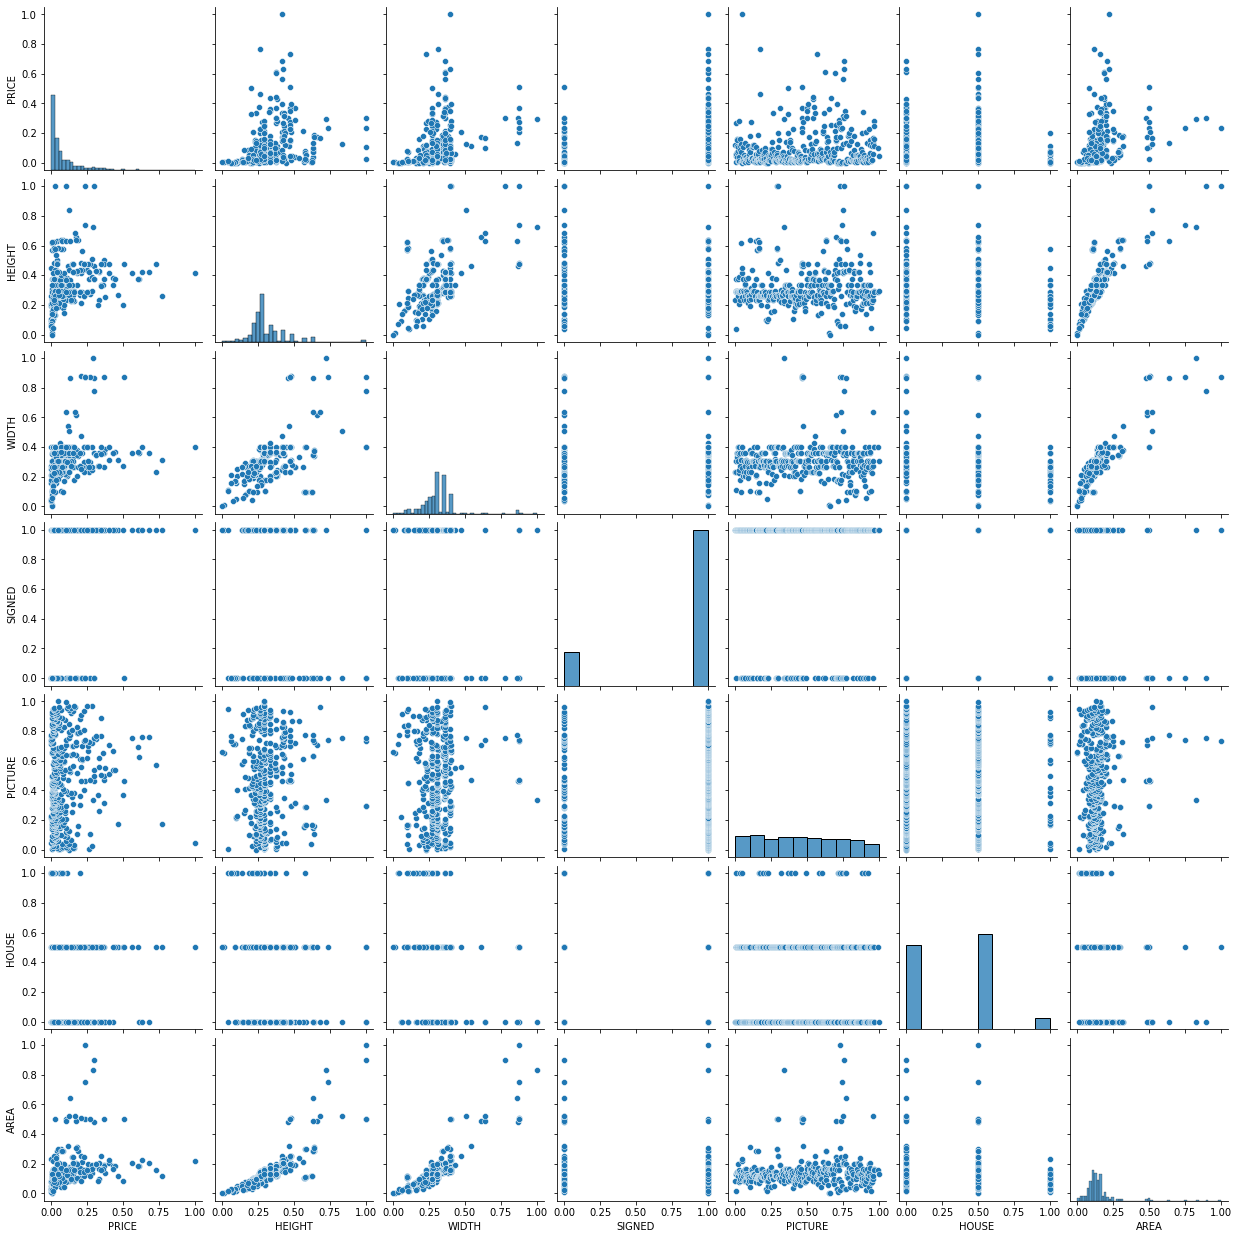

In [92]:
# EDA for the given data
sns.pairplot(minmax_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


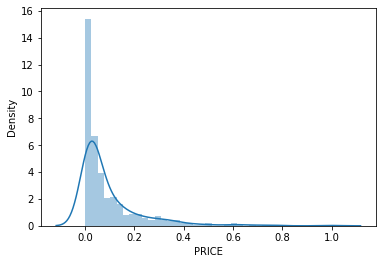

In [93]:
# price distribution plotting
sns.distplot(minmax_dataset["PRICE"])

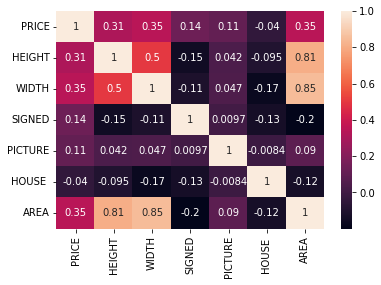

In [94]:
# corelation
sns.heatmap(minmax_dataset.corr(), annot=True)

**Multivariate Linear regression model**

In [97]:
# Defining X and y axis
X = minmax_dataset[["AREA","PICTURE","SIGNED","WIDTH","HEIGHT",]]
Y = minmax_dataset["PRICE"]

In [98]:
# splitting for test and train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [99]:
# Creating and training linear regression model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [100]:
# checking the model score 
print(lm.intercept_)

-0.17589764054089524


The score is less than zero but still we can proceed with the model

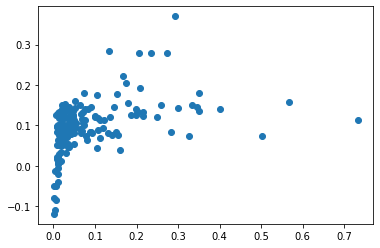

In [101]:
# model prediction
predictions = lm.predict(X_test)
# scatterplot
plt.scatter(Y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


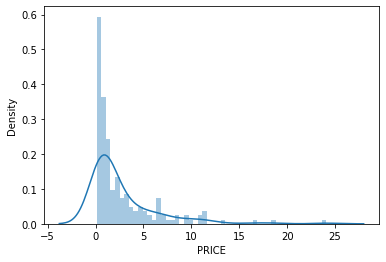

In [102]:
# histogram representation
sns.distplot((y_test-predictions),bins=50);

Error Metrics for multivariate linear regression model

In [103]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.07196823338768973
MSE: 0.010526175741517008
RMSE: 0.1025971526969292


We can observe the errors are far more better than the first two univariate models which we have created in TASK-1. 

# **CONCLUSION** : This huge difference in error is because we have normalized the raw data before modeling the data in task 2 but were as in Task 1 we havent normalized the data and used raw data so this difference in models. But mostly univariate is preferable to avoid overfitting.